# Studying the Small Scale Environment
## Relating Dwarf Galaxy Properties to Their Distance to Nearest Neighbor 

## Reading in NSA FITS file

### NSA (NASA Sloan Atlas)


 

In [1]:
#import astropy

from astropy.io import fits

from astropy.table import Table


In [2]:
#Reading in data file

fits_NSA_file = r'C:\Users\caeho\OneDrive\Documents\University of Rochester REU\NSA_v1_0_1_VAGC_vflag-V2-VF.fits'

hdul = fits.open(fits_NSA_file) 

In [4]:
hdul.info()

Filename: C:\Users\caeho\OneDrive\Documents\University of Rochester REU\NSA_v1_0_1_VAGC_vflag-V2-VF.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    330   641409R x 141C   [19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, J, E, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7B, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, I, J, D, D, E, 6A, 27A, 8A, J, D, D, E, E, E, E, E, E, E, E, 7E, 7E, 7E, 7E, E, 7E, 7E, 7E, 7E, I, 7E, 7E, 7E, 7E, 5E, E, 7E, E, E, E, D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K]   


In [5]:
# Names of all the collumns in the data base

data_header = hdul[1].header
data_header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4091 / length of dimension 1                          
NAXIS2  =               641409 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  141 / number of table fields                         
TTYPE1  = 'IAUNAME '                                                            
TFORM1  = '19A     '                                                            
TTYPE2  = 'SUBDIR  '                                                            
TFORM2  = '27A     '                                                            
TTYPE3  = 'RA      '        

In [6]:
# test of selecting an area of data (not needed)

data = hdul[1].data

data['ELPETRO_ABSMAG'][:,4]   #test

array([-19.303656, -19.976496, -18.431812, ..., -18.258053, -17.241238,
       -19.631086], dtype=float32)

### Creating a smaller data table with only data I will need

In [7]:
data_table = Table()

data_table['aimc'] = data['aimc']
data_table['IN_DR7_LSS'] = data['IN_DR7_LSS']
data_table['RA'] = data['RA']
data_table['DEC'] = data['DEC']
data_table['Z'] = data['Z']
data_table['ELPETRO_ABSMAG_r'] = data['ELPETRO_ABSMAG'][:,4]
data_table['u_r'] = data['u_r']
data_table['sSFR'] = data['sSFR']
data_table['HImass'] = data['HImass']
data_table['flag3727'] = data['flag3727']
data_table['t3'] = data['t3']
data_table['Z12logOH'] = data['Z12logOH']
data_table['Zerr'] = data['Zerr']
data_table['logNO'] = data['logNO']
data_table['NOerr'] = data['NOerr']
data_table['vflag_VF'] = data['vFlag_VF']
data_table['ID#'] = [i for i in range(len(data_table))]

In [8]:
mask = data_table['Z']>0     #removing objects that are not galaxies
data_table = data_table[mask]

In [9]:
data_table[:10] # viewing first 5 rows of data as reference

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32
-99.0,0.0,146.714215072841,-1.0412800233313741,0.021222278,-19.303656,2.3124398291110992,nan,nan,nan,nan,nan,nan,nan,nan,9,0
1.0,1.0,146.6285851269414,-0.7651620976591762,0.06465632,-19.976496,2.976039946079254,-11.241625785827637,nan,nan,nan,nan,nan,nan,nan,2,1
-99.0,0.0,146.63170644325592,-0.9883467023052999,0.05265425,-18.431812,1.7119742929935455,nan,nan,nan,nan,nan,nan,nan,nan,2,2
1.0,1.0,146.9341288729797,-0.6704053610430766,0.121270485,-21.559162,3.0934733152389526,-11.71275806427002,nan,nan,nan,nan,nan,nan,nan,9,3
-99.0,1.0,146.9634997327016,-0.5447758299302171,0.055980586,-19.100992,2.044341266155243,nan,nan,nan,nan,nan,nan,nan,nan,2,4
2.0,1.0,146.96352370262414,-0.7593404235056136,0.09708638,-20.089943,2.836669385433197,-10.860784530639648,nan,nan,nan,nan,nan,nan,nan,2,5
-1.0,1.0,146.85984630722874,-0.8089065016506019,0.12658988,-21.062517,2.6804080605506897,-12.071269035339355,nan,nan,nan,nan,nan,nan,nan,9,6
40.35,1.0,146.5927838471015,-0.7602574022145185,0.064959235,-19.976143,2.08747461438179,-10.100362777709961,nan,1.0,6.100532417853275,6.363146339155186,0.33988585308459446,-0.18586781042085843,0.404887347385603,2,7
-2.0,1.0,146.72838067287842,-0.5569743913807053,0.089311965,-19.900196,2.5430691242218018,-11.400724411010742,nan,nan,nan,nan,nan,nan,nan,2,8


## 2D (RA, DEC) Plot of Galaxies 

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

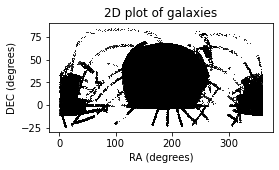

In [11]:
plt.rcParams["figure.figsize"] = (4,2)  #increase size of figure

plt.title('2D plot of galaxies') #title
plt.xlabel('RA (degrees)') #x label
plt.ylabel('DEC (degrees)') #y label

plt.scatter(data_table['RA'], data_table['DEC'], marker='o', c='k', s=1, lw=0);



## 3D Plot Attempt (RA, DEC, Z)

In [ ]:
plt.rcParams["figure.figsize"] = (8,4) #increase size of figure

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data_table['RA'], data_table['DEC'], data_table['Z'],marker='o', c='k', s=1, lw=0) # (x, y, z)

# labeling Plot
plt.title('3D plot of galaxies')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_zlabel('Z')

plt.show()



## RA and DEC Equatorial Coords Attempt (not necessary)

using this code as a guide
https://stackoverflow.com/questions/29525356/produce-a-ra-vs-dec-equatorial-coordinates-plot-with-python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams["figure.figsize"] = (4,2) #increase size of figure

# Read RA, DEC data from file.
ra = data_table['RA']
dec = data_table['DEC']
# Convert RA from decimal degrees to radians.
ra = [x / 180.0 * 3.141593 for x in ra]

# Make plot.
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(4, 2)
# Position plot in figure using gridspec.
ax = plt.subplot(gs[0], polar=True)

# Set x,y ticks (this is not correctly set up for my plot)
angs = np.array([330., 345., 0., 15., 30., 45., 60., 75., 90., 105., 120.])
plt.xticks(angs * np.pi / 180., fontsize=8)
plt.yticks(np.arange(-80, -59, 10), fontsize=8)
ax.set_rlabel_position(120)
ax.set_xticklabels(['$22^h$', '$23^h$', '$0^h$', '$1^h$', '$2^h$', '$3^h$',
    '$4^h$', '$5^h$', '$6^h$', '$7^h$', '$8^h$'], fontsize=10)
ax.set_yticklabels(['$-80^{\circ}$', '$-70^{\circ}$', '$-60^{\circ}$'],
    fontsize=10)

# Plot points.
ax.scatter(ra, dec, marker='o', c='k', s=1, lw=0.);

## Galatic Coordinate Plot

using this a guide https://astronomy.stackexchange.com/questions/32601/how-do-i-plot-galactic-coordinates-using-matplotlib-and-astropy-in-python

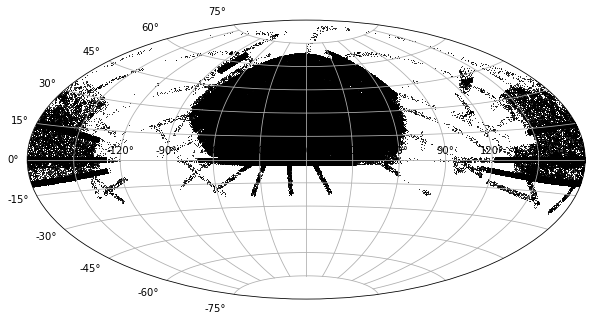

In [12]:
import astropy.units as u
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord

plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

eq = SkyCoord(180-data_table['RA'], data_table['DEC'], unit=u.deg)
gal = eq.galactic

gal = SkyCoord(180-data_table['RA'], data_table['DEC'], frame='galactic', unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian,
            gal.b.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code


## Finding Nearest Neighbor & Distance

### Table of only Dwarf Galaxies (ABSMAG_r >-17)

reference https://stackoverflow.com/questions/60448562/remove-row-from-astropy-table

In [13]:
import pandas as pd
import numpy as np

dwarf_table = data_table
mask = (dwarf_table['ELPETRO_ABSMAG_r']<-17) | (dwarf_table['IN_DR7_LSS']!= 1)
dwarf_table = dwarf_table[~mask]
RA_boolean = (dwarf_table['RA']>110) & (dwarf_table['RA']<270) #removing strips and area outside main area
dwarf_table = dwarf_table[RA_boolean]
dwarf_table[:5]

#print(len(dwarf_table))
#print(len(data_table))

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282841,-15.534674,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12
106.68,1.0,146.85676432411947,-0.27409664376066756,0.021964595,-16.700323,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323,-15.290873,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44
199.39,1.0,146.00780426178756,-0.6422574964819474,0.0047763,-15.831653,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635,-16.344551,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49


### Galactic plot of Dwarf Galaxies
            

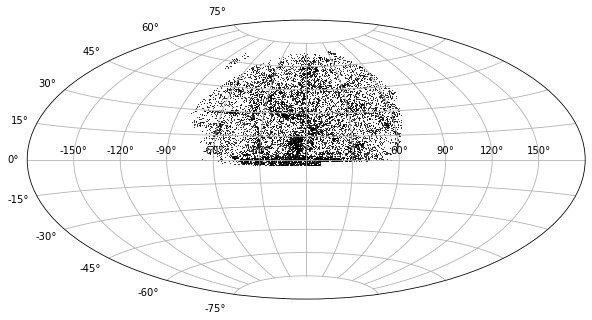

In [14]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

eq = SkyCoord(180-dwarf_table['RA'], dwarf_table['DEC'], unit=u.deg)
gal = eq.galactic

gal = SkyCoord(180-dwarf_table['RA'], dwarf_table['DEC'], frame='galactic', unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)

plt.scatter(gal.l.wrap_at('180d').radian,
            gal.b.radian, marker='o', c='k', s=1, lw=0); 


### Distance Method #1: 2D Distance 

Calculating the relative velocity b/t each galaxy

Equation to calculate relative velocity: $v_{rel} = |z_{a} - z_{b}|c$

All neighbors galaxies have a maximum relative velocity: $v_{rel} < 300  km/s$

info on SkyCoord under the section "Distance" https://docs.astropy.org/en/stable/coordinates/index.html

In [ ]:
'''
dwarf_table['2D_neighbor_dist_vir'] = np.nan

for i in range(20): #len(dwarf_table)):
    neighbor_index = dwarf_table['2D_neighbor_ID'][i]
    M = data_table['ELPETRO_ABSMAG_r'][neighbor_index]
    if data_table['aimc'][neighbor_index] not in [1,2]:
        gamma_ratio = 2
    else:
        gamma_ratio = 1
    L_ratio = 10**((-20-M)/2.5)
    r_vir = ((3*gamma_ratio*L_ratio)/(4*740*0.0223*np.pi))**(1./3) 
    
    dwarf_table['2D_neighbor_dist_vir'][i] = dwarf_table['2D_neighbor_dist'][i] / r_vir
    
    print(r_vir)
    
'''

In [15]:
from astropy import constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord

h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant

#creating the new columns
dwarf_table['2D_neighbor_ID'] = -1
dwarf_table['2D_neighbor_dist'] = np.nan

#columns for virial radius normalization 
dwarf_table['2D_neighbor_ID_vir'] = -1
dwarf_table['2D_neighbor_dist_vir'] = np.nan

#gamma ratio in virial radius calculation
data_table['gamma_ratio'] = 1 
data_table['gamma_ratio'][data_table['aimc'] == 1] = 2 
data_table['gamma_ratio'][data_table['aimc'] == 2] = 2
                          


for i in range(len(dwarf_table)):
    neighbor_list=(abs(dwarf_table['Z'][i]-data_table['Z'])*const.c) < 300*u.km/u.s #galaxies in relative velocity constraint
    
    di = data_table['ID#'] == dwarf_table['ID#'][i] #finding the dwarf galaxy inside larger table
    neighbor_list[di]= False #removing from its neighbor list
   
    avg_dist = .5*const.c.to('km/s')*(dwarf_table['Z'][i]+data_table['Z'][neighbor_list])/H0 #avg distance to systems
    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=avg_dist)
    neighbor_pos = SkyCoord(ra=data_table['RA'][neighbor_list]*u.degree, 
                            dec=data_table['DEC'][neighbor_list]*u.degree, distance=avg_dist)
    
    neighbor_dist=neighbor_pos.separation_3d(dwarf_pos) #separation calculation of all possible neighbors
    
    nearby_neigh_index = np.argmin(neighbor_dist) #finding closest neighbor
    
    dwarf_table['2D_neighbor_dist'][i] = neighbor_dist[nearby_neigh_index].value #unit Mpc, adding to dwarf table
    
    neighbor_id = data_table['ID#'][neighbor_list] 
    dwarf_table['2D_neighbor_ID'][i] = neighbor_id[nearby_neigh_index] #adding neighbor galaxy's ID to dwarf table
    
    
    # Doing calculation with virial radius normalization
    
    M = data_table['ELPETRO_ABSMAG_r'][neighbor_list] #absolute magnitude of neighboring galaxies
    
    gamma_ratio = data_table['gamma_ratio'][neighbor_list] #gamma ratio of neighboring galaxies
    
    
    L_ratio = 10**((-20-M)/2.5) #luminosity ratio for virial radius calcuation
    
    r_vir = ((3*gamma_ratio*L_ratio)/(4*740*0.0223*np.pi))**(1./3) # calculating virial radius of all neighboring galaxies
    
    
    neighbor_dist_vir = neighbor_dist / r_vir # normalizing distance
    
    nearby_neigh_index_vir = np.argmin(neighbor_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['2D_neighbor_dist_vir'][i] = neighbor_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    dwarf_table['2D_neighbor_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table
    
    
    

C:\Users\caeho\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [17]:
dwarf_table[:20]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282841,-15.534674,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546
106.68,1.0,146.85676432411947,-0.27409664376066756,0.021964595,-16.700323,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323,-15.290873,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,339939,nan
199.39,1.0,146.00780426178756,-0.6422574964819474,0.0047763,-15.831653,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,339939,nan
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635,-16.344551,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895,-16.594152,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824
0.0,1.0,145.3209420527222,0.771115298508063,0.0065894895,-14.810565,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062
-99.0,1.0,145.4212238164792,0.5359777701124617,0.14598592,-14.866592,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164,-14.235288,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165


### Distance Method #2: 3D Distance

In [18]:

#creating the new columns
dwarf_table['3D_neighbor_ID'] = -1
dwarf_table['3D_neighbor_dist'] = np.nan

#columns for virial radius normalization 
dwarf_table['3D_neighbor_ID_vir'] = -1
dwarf_table['3D_neighbor_dist_vir'] = np.nan

h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant

#gal_r = const.c.to('km/s')*data_table['Z']/H0
#gal_pos = SkyCoord(ra=data_table['RA']*u.degree, 
                            #dec=data_table['DEC']*u.degree, distance=gal_r)




for i in range(10): #len(dwarf_table)):
    di = ~(data_table['ID#'] == dwarf_table['ID#'][i]) #finding the dwarf galaxy inside larger table
    #data_table[di]= False #removing dwarf from the full table to not count itself
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    gal_r = const.c.to('km/s')*data_table['Z'][di]/H0

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    gal_pos = SkyCoord(ra=data_table['RA'][di]*u.degree, 
                            dec=data_table['DEC'][di]*u.degree, distance=gal_r)
    neighbor_dist=gal_pos.separation_3d(dwarf_pos)
    
    nearby_neigh_index = np.argmin(neighbor_dist) #finding the nearest neighbor
    
    
    dwarf_table['3D_neighbor_dist'][i] = neighbor_dist[nearby_neigh_index].value #unit Mpc
     
    neighbor_id = data_table['ID#'][di] 
    dwarf_table['3D_neighbor_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    
    # Doing calculation with virial radius normalization
    # Doing calculation with virial radius normalization
    
    M = data_table['ELPETRO_ABSMAG_r'][di] #[data_table] #absolute magnitude of neighboring galaxies
    
    gamma_ratio = data_table['gamma_ratio'][di] #[data_table] #gamma ratio of neighboring galaxies
    
    
    L_ratio = 10**((-20-M)/2.5) #luminosity ratio for virial radius calcuation
    
    r_vir = ((3*gamma_ratio*L_ratio)/(4*740*0.0223*np.pi))**(1./3) # calculating virial radius of all neighboring galaxies
    
    
    neighbor_dist_vir_3D = neighbor_dist / r_vir # normalizing distance
    

    
    nearby_neigh_index_vir_3D = np.argmin(neighbor_dist_vir_3D) #finding closest neighbor with normalized virial distance
    
    dwarf_table['3D_neighbor_dist_vir'][i] = neighbor_dist_vir_3D[nearby_neigh_index_vir_3D].value #unit , adding to dwarf table
    
    
    neighbor_id = data_table['ID#'][di]
    dwarf_table['3D_neighbor_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir_3D] #adding neighbor galaxy's ID to dwarf table
    
    
    
    

C:\Users\caeho\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [19]:
dwarf_table[:10]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282841,-15.534674,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,10478,nan
106.68,1.0,146.85676432411947,-0.27409664376066756,0.021964595,-16.700323,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,10478,nan
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323,-15.290873,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,339939,nan,585695,0.221530846641702,10478,nan
199.39,1.0,146.00780426178756,-0.6422574964819474,0.0047763,-15.831653,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,339939,nan,639857,0.6010801341408164,10478,nan
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635,-16.344551,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,10478,nan
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895,-16.594152,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,10478,nan
0.0,1.0,145.3209420527222,0.771115298508063,0.0065894895,-14.810565,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,10478,nan
-99.0,1.0,145.4212238164792,0.5359777701124617,0.14598592,-14.866592,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,10478,nan
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164,-14.235288,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,10478,nan


In [ ]:
print(dwarf_table['2D_neighbor_ID'][1])
print(data_table['ELPETRO_ABSMAG_r'][79])
print(data_table['ELPETRO_ABSMAG_r'][dwarf_table['2D_neighbor_ID'][1]])

In [ ]:
print(data_table['aimc'][dwarf_table['2D_neighbor_ID'][16]])
print(data_table['aimc'][1345])

In [ ]:
dwarf_table[:5]

In [ ]:
dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.5, label = 'void')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['u_r'][dwarf_other], "g", alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('x label')
plt.ylabel('y label');

In [ ]:
#hdul.close() #closes file